# Introduction the NN

In essence: For each epoch, for each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

**NOTE ABOUT NNs: Both the Sequential API and the Functional API are declarative: you start by declar‐ ing which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference.**


<img src="../img/derivatives_activation.png" width="80%">

*Derivatives: rate of change*


**Key Differences Between Perceptron and Neuron**
| Feature               | Perceptron                       | Neuron in MLP                   |
|-----------------------|-----------------------------------|----------------------------------|
| **Activation Function** | Step function                   | Nonlinear (e.g., ReLU, sigmoid) |
| **Output**            | Binary (0 or 1)                  | Continuous or nonlinear values  |
| **Usage**             | Single-layer models (linear tasks) | Multilayer networks (nonlinear tasks) |
| **Problem Solving**   | Only linear separability         | Handles nonlinear problems      |


## **Regression MLPs**

| Hyperparameter        | Typical Value                                                                 |
|-----------------------|------------------------------------------------------------------------------|
| # input neurons       | One per input feature (e.g., 28 x 28 = 784 for MNIST)                       |
| # hidden layers       | Depends on the problem. Typically 1 to 5.                                   |
| # neurons per hidden layer | Depends on the problem. Typically 10 to 100.                            |
| # output neurons      | 1 per prediction dimension (if you expect 2 values, then 2 outputs)                                                  |
| Hidden activation     | ReLU (or SELU)                                              |
| Output activation     | None or ReLU/Softplus (if positive outputs) or Logistic (0 to 1)/Tanh (hyperbolic tangent)(-1 to 1) (if bounded outputs) |
| Loss function         | MSE or MAE/Huber (if outliers)                                              |




In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)

print(rmse)

0.5053326657968423


## **Classification MLPs**

| Hyperparameter            | Binary classification | Multilabel binary classification | Multiclass classification |
|---------------------------|-----------------------|-----------------------------------|---------------------------|
| Input and hidden layers   | Same as regression   | Same as regression               | Same as regression       |
| # output neurons          | 1                   | 1 per label                      | 1 per class              |
| Output layer activation   | Logistic (sigmoid for NNs)           | Logistic                          | Softmax                  |
| Loss function   | (binary)Cross-entropy            | (categorical)Cross-entropy                         | (sparse-categorical)Cross-entropy                  |


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

## **Simple image classifier with Keras**

In [4]:
import tensorflow as tf
from tensorflow import keras

tf.__version__
keras.__version__


2024-12-09 19:27:54.784462: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'3.7.0'

In [5]:
# if FETCH WORKS
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.


In [ ]:
# IF FETCH DOES NOT WORK

import gzip
import numpy as np


# the fashion ds has 10 categories, like mnist, but with clothes

def load_idx(filepath):
    """Load IDX format data from a gzip file."""
    with gzip.open(filepath, 'rb') as f:
        # Read the file content
        data = f.read()
        # Magic number (first 4 bytes)
        magic = int.from_bytes(data[0:4], byteorder='big')
        # Number of items (next 4 bytes)
        num_items = int.from_bytes(data[4:8], byteorder='big')
        if magic == 2049:  # Labels
            return np.frombuffer(data[8:], dtype=np.uint8)
        elif magic == 2051:  # Images
            rows = int.from_bytes(data[8:12], byteorder='big')
            cols = int.from_bytes(data[12:16], byteorder='big')
            images = np.frombuffer(data[16:], dtype=np.uint8)
            return images.reshape(num_items, rows, cols)
        else:
            raise ValueError("Unknown magic number in file header!")

# Paths to the data files
train_images_path = '../data/fashion/train-images-idx3-ubyte.gz'
train_labels_path = '../data/fashion/train-labels-idx1-ubyte.gz'
test_images_path = '../data/fashion/t10k-images-idx3-ubyte.gz'
test_labels_path = '../data/fashion/t10k-labels-idx1-ubyte.gz'

# Load the data
X_train_full = load_idx(train_images_path)
y_train_full = load_idx(train_labels_path)
X_test = load_idx(test_images_path)
y_test = load_idx(test_labels_path)

# Normalize the image data
# we also need to scale the data, for simplicity we will scale the pixel intensities in the 0-1 range simply dividing them by 255

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

print("Train images shape:", X_train_full.shape)
print("Train labels shape:", y_train_full.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [80]:
# here we will create a validation set

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



In [7]:
X_train.shape

(55000, 28, 28)

Matplotlib is building the font cache; this may take a moment.


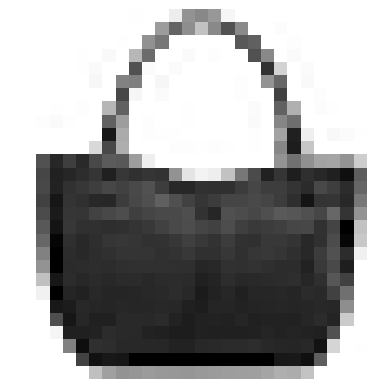

In [9]:
# extra code
import matplotlib.pyplot as plt

plt.imshow(X_train[100], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
# create class name
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
# sample of class for a given item
class_names[y_train[100]]

#y_train[10]

'Bag'

## My first Keras sequential model - Classification

In [13]:
model = keras.models.Sequential([

    keras.layers.Flatten(input_shape=[28,28]), # receives input data and converts it to 1d array
    keras.layers.Dense(300, activation="relu"), # dense layer with 300 neurons
    keras.layers.Dense(100, activation="relu"), # second dense layer with 100 neurons
    keras.layers.Dense(10, activation="softmax") #output layer, with 10 nodes, as 10 classes, softmax because multiclass
])

/Users/gabi/codes/data_science/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# get info about the model including output shape of each layer and the number of parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# you can get all the layers of a model
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [16]:
# you can call each layer by its index
model.layers[1].name

'dense'

In [17]:
# you can het the layer by its name
model.get_layer("dense_2").name

'dense_2'

In [18]:
# you can get all the weights and biases from each layer
weights, biases = model.layers[1].get_weights()

weights

array([[ 0.05403419, -0.00725313, -0.01285256, ...,  0.03761493,
        -0.00464329,  0.06443502],
       [ 0.06992011, -0.06634848,  0.04443703, ...,  0.0318657 ,
         0.06228201,  0.01455625],
       [ 0.00581784, -0.04326789, -0.02376759, ..., -0.01441506,
        -0.03279389, -0.02729871],
       ...,
       [-0.01717574,  0.01540208, -0.0136414 , ...,  0.01484972,
        -0.06255511, -0.06479155],
       [-0.06433344,  0.01617884,  0.01409102, ...,  0.07022028,
        -0.00495759,  0.06894739],
       [ 0.05657233,  0.05024802,  0.06509876, ...,  0.04280004,
        -0.02753646,  0.00013673]], dtype=float32)

In [22]:
# once the model is created you must call compile() and specify the loss function, optimiser, and optionally metrics for evaluation

model.compile(loss="sparse_categorical_crossentropy", 
                optimizer="sgd", 
                metrics=["accuracy"])

In [23]:
# now you fit the model

history = model.fit(X_train, y_train, epochs=30,
            validation_data=(X_valid, y_valid)) #validation data is optional, but desirable

            # you can also use validation_split = z, where z is between (0,1), a ratio of X_train

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6695 - loss: 1.0362 - val_accuracy: 0.8192 - val_loss: 0.5163
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8219 - loss: 0.5084 - val_accuracy: 0.8300 - val_loss: 0.4644
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8449 - loss: 0.4471 - val_accuracy: 0.8418 - val_loss: 0.4526
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8517 - loss: 0.4261 - val_accuracy: 0.8594 - val_loss: 0.4009
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8625 - loss: 0.3975 - val_accuracy: 0.8644 - val_loss: 0.3879
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8688 - loss: 0.3786 - val_accuracy: 0.8628 - val_loss: 0.3841
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.3670 - val_accuracy: 0.8314 - val_loss: 0.4573
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8746 - loss: 0.3547 - 

In [29]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


- If the training set was very skewed: use class_weight in fit()
- sample_weight can be used in fit if the labels have been set by different people (image labels by experts and labels by a community)
- if the loss is still decreasing, it means the model didn't converge yet, and you should continue training it

In [25]:
# the fit method returns a history object

print(f"Training parameters \n {history.params}") # training parameters
print(f"List of epochs \n {history.epoch}") #list of epochs
print(f"Dictionary of loss and extra metrics \n {history.history}")

Training parameters 
 {'verbose': 'auto', 'epochs': 30, 'steps': 1719}
List of epochs 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Dictionary of loss and extra metrics 
 {'accuracy': [0.7560363411903381, 0.8291090726852417, 0.8449817895889282, 0.8552181720733643, 0.8621818423271179, 0.8685454726219177, 0.8719817996025085, 0.8751817941665649, 0.8799818158149719, 0.8843454718589783, 0.8841090798377991, 0.8881090879440308, 0.8901636600494385, 0.8950181603431702, 0.895618200302124, 0.8967090845108032, 0.8987454771995544, 0.9005454778671265, 0.9033818244934082, 0.904872715473175, 0.9064000248908997, 0.9082000255584717, 0.9094181656837463, 0.9106181859970093, 0.9128545522689819, 0.9147999882698059, 0.9168182015419006, 0.9171454310417175, 0.9184545278549194, 0.9203454256057739], 'loss': [0.740820586681366, 0.49119457602500916, 0.4438423216342926, 0.4171612858772278, 0.39485105872154236, 0.37822777032852173, 0.3648855090141296

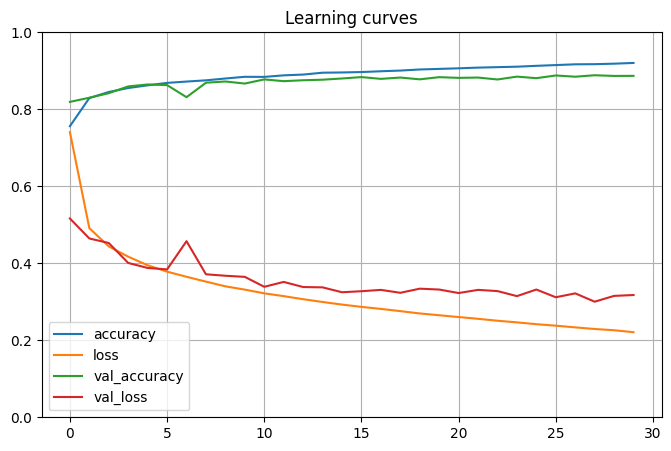

In [ ]:
# you can plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))

plt.title("Learning curves")
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0, -1]

plt.show()

In [30]:
# evaluate the model on test set
print(f"Test set performance: {model.evaluate(X_test, y_test)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.3352
Test set performance: [0.33721521496772766, 0.8779000043869019]


In [31]:
# making predicitons for the first 3 itens in X_test

X_predicitons = X_test[:3]
y_proba = model.predict(X_predicitons)

print("Predicted probabilities")
print(y_proba.round(2))

print("===" *10)

# in newer versions of KEras, .predict_classes has been deprecated
# use instead
# np.argmax(y_proba, axis=1)

print(f"Predicted class {np.array(class_names)[np.argmax(y_proba, axis=1)]}")
print(f"Actual classes: {np.array(class_names)[y_test[:3]]}")

#  this sample code uses a list and translate the values
# np.array(class_names)[np.argmax(y_proba, axis=1)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted probabilities
[[0.   0.   0.   0.   0.   0.01 0.   0.03 0.   0.96]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
Predicted class ['Ankle boot' 'Pullover' 'Trouser']
Actual classes: ['Ankle boot' 'Pullover' 'Trouser']


## My first Keras sequential: Regression

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)

# split train into train and validation, with default 80/20 split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# ANOTHER WAY FOR IMPLEMENTATION
#tf.random.set_seed(42)
#norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
#model = tf.keras.Sequential([
#    norm_layer,
#    tf.keras.layers.Dense(50, activation="relu"),
#    tf.keras.layers.Dense(50, activation="relu"),
#    tf.keras.layers.Dense(50, activation="relu"),
#    tf.keras.layers.Dense(1)
#])
#optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
#model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
#norm_layer.adapt(X_train)
#history = model.fit(X_train, y_train, epochs=20,
#                    validation_data=(X_valid, y_valid))
#mse_test, rmse_test = model.evaluate(X_test, y_test)

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # the last layer has only one output because it's the value we're trying to predict
])

model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["RootMeanSquaredError"])

history = model.fit(X_train_scaled, y_train, epochs=20,
        validation_data= (X_valid_scaled, y_valid))

mse_test = model.evaluate(X_test_scaled, y_test)

print(f"MSE test {mse_test}")

Epoch 1/20


/Users/gabi/codes/data_science/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.1085 - loss: 1.2941 - val_RootMeanSquaredError: 2.7544 - val_loss: 7.5868
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.8571 - loss: 0.7559 - val_RootMeanSquaredError: 0.7282 - val_loss: 0.5303
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6818 - loss: 0.4650 - val_RootMeanSquaredError: 0.7286 - val_loss: 0.5309
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6703 - loss: 0.4493 - val_RootMeanSquaredError: 0.6643 - val_loss: 0.4413
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6501 - loss: 0.4229 - val_RootMeanSquaredError: 0.6646 - val_loss: 0.4418
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6412 - loss: 0.4112 - val_RootMeanSquaredError: 0.6469 - val_loss: 0.4185
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6433 - loss: 0.4139 -

In [ ]:
# another way to implement the above
import tensorflow as tf

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)

Epoch 1/20


/Users/gabi/codes/data_science/.venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.1029 - loss: 1.2990 - val_RootMeanSquaredError: 0.6466 - val_loss: 0.4181
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6050 - loss: 0.3661 - val_RootMeanSquaredError: 0.6984 - val_loss: 0.4877
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5840 - loss: 0.3412 - val_RootMeanSquaredError: 0.6674 - val_loss: 0.4454
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5704 - loss: 0.3254 - val_RootMeanSquaredError: 0.7382 - val_loss: 0.5450
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5590 - loss: 0.3126 - val_RootMeanSquaredError: 0.8904 - val_loss: 0.7928
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5498 - loss: 0.3023 - val_RootMeanSquaredError: 0.7672 - val_loss: 0.5886
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5443 - loss: 0.2963 -

## Building a complex model

It's possible to create a model where not all layers are connected to each other. This allows the model to deal with both simple and complex patterns better.

<img src="../img/wide-and-deep-nn.png" width="30%">

In [ ]:
# example of wide and deep neural network

# reset the name counters and make the code reproducible
tf.keras.backend.clear_session()

tf.random.set_seed(42)

normalisation_layer = tf.keras.layers.Normalization()

hidden_layer_1 = tf.keras.layers.Dense(30, activation="relu")
# an alternative way is to pass the input here with
# hidden_layer_1 = tf.keras.layers.Dense(30, activation="relu")(input)
hidden_layer_2 = tf.keras.layers.Dense(30, activation="relu")

contact_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

## set the shape of the nn
input_ = tf.keras.layers.Input(shape=X_train.shape[1:]) # first we need to create an input object, because we can have multiple inputs
normalised = normalisation_layer(input_)
hidden1 = hidden_layer_1(normalised)
hidden2 = hidden_layer_2(hidden1)
concat = contact_layer([normalised, hidden2])

output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

normalisation_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20, 
            validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

print(mse_test)


Epoch 1/20


/Users/gabi/codes/data_science/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5351 - loss: 0.2864 - val_RootMeanSquaredError: 1.0447 - val_loss: 1.0913
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5325 - loss: 0.2836 - val_RootMeanSquaredError: 1.1219 - val_loss: 1.2586
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5313 - loss: 0.2823 - val_RootMeanSquaredError: 1.1820 - val_loss: 1.3972
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5303 - loss: 0.2812 - val_RootMeanSquaredError: 1.2455 - val_loss: 1.5512
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5292 - loss: 0.2802 - val_RootMeanSquaredError: 1.1448 - val_loss: 1.3105
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5286 - loss: 0.2795 - val_RootMeanSquaredError: 1.2763 - val_loss: 1.6290
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5276 - loss: 0.2784 -

We can also pass only a subset of features through the wide path.

<img src="../img/multiple_inputs.png" width="30%">

In [27]:
tf.keras.backend.clear_session()

tf.random.set_seed(42)

input_A = tf.keras.layers.Input(shape=[5]) # pass 5 features as input A (in this case, it will be 0 to 4, speficified below), it will go through deep path
input_B = tf.keras.layers.Input(shape=[6]) # pass 6 features as input B (in this case, it will be 2 to 7, speficified below), it will go thorugh wide path

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_A)
norm_deep = norm_layer_deep(input_B)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.models.Model(inputs=[input_A, input_B], outputs=[output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# note you need to specifify the inputs A & B for all the sets
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

norm_layer_wide.adapt(X_train_A)
norm_layer_deep.adapt(X_train_B)

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

print(f"\n\nMSE Test: {mse_test}")




Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.5307 - loss: 2.4702 - val_RootMeanSquaredError: 0.7186 - val_loss: 0.5164
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6786 - loss: 0.4607 - val_RootMeanSquaredError: 0.7124 - val_loss: 0.5076
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6347 - loss: 0.4029 - val_RootMeanSquaredError: 0.6798 - val_loss: 0.4622
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6191 - loss: 0.3833 - val_RootMeanSquaredError: 0.6256 - val_loss: 0.3913
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6087 - loss: 0.3706 - val_RootMeanSquaredError: 0.6373 - val_loss: 0.4062
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6016 - loss: 0.3620 - val_RootMeanSquaredError: 0.8861 - val_loss: 0.7853
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5961 - los

## Saving and restoring a model

In [ ]:
# saving a trained Keras model
model.save("my_keras_model.keras")



In [31]:
# load the model
loaded_model = tf.keras.models.load_model(
    "my_keras_model.keras",
    #custom_objects={"WideAndDeepModel": WideAndDeepModel} # if the model uses any custom_object, use it here
)

loaded_model.evaluate((X_test_A, X_test_B), y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5731 - loss: 0.3290


[0.34250977635383606, 0.5852433443069458]

## Using Callbacks

You can use callbacks so that keras will perform, for example, during the start of each training, at the end of ech epoch, and even before and after training each batch. This can be useful, for examplo, as a checkpoint in case your machine dies. You can also save the best model only, when you're using a validation set, by the use of callbacks (this is an easy way to implement early stopping).

Another thing you can do regarding **early stopping" is simply use .EarlyStopping with a large number of epochs. The model will stop training if the performance doesn't improve after a number of epochs and run back to the best performing model.

In [35]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_A, X_train_B), (y_train), epochs=10,
    validation_data=((X_valid_A, X_valid_B), (y_valid)),
    callbacks=[checkpoint_cb])


Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5634 - loss: 0.3175 - val_RootMeanSquaredError: 2.9200 - val_loss: 8.5264
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5643 - loss: 0.3185 - val_RootMeanSquaredError: 5.1238 - val_loss: 26.2537
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5653 - loss: 0.3197 - val_RootMeanSquaredError: 2.2452 - val_loss: 5.0408
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5602 - loss: 0.3138 - val_RootMeanSquaredError: 3.5219 - val_loss: 12.4038
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5607 - loss: 0.3144 - val_RootMeanSquaredError: 2.9561 - val_loss: 8.7385
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5597 - loss: 0.3134 - val_RootMeanSquaredError: 4.0569 - val_loss: 16.4586
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5575 - 

In [36]:
# example of early stopping

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,  #determines how many epochs will run before early stopping
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_A, X_train_B), (y_train), epochs=100,
    validation_data=((X_valid_A, X_valid_B), (y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5538 - loss: 0.3067 - val_RootMeanSquaredError: 3.5171 - val_loss: 12.3697
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5519 - loss: 0.3046 - val_RootMeanSquaredError: 3.7372 - val_loss: 13.9667
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5517 - loss: 0.3044 - val_RootMeanSquaredError: 3.6580 - val_loss: 13.3810
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5511 - loss: 0.3037 - val_RootMeanSquaredError: 2.5621 - val_loss: 6.5643
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5490 - loss: 0.3015 - val_RootMeanSquaredError: 3.9352 - val_loss: 15.4855
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5492 - loss: 0.3017 - val_RootMeanSquaredError: 3.5409 - val_loss: 12.5381
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 

## Visualisation with TensorBoard

In [ ]:
# set a root log directory for TensorBoard
import os

log_directory = os.path.join(os.curdir, "tensorboard_logs")

def get_run_log_directory():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(log_directory, run_id)

run_log_directory = get_run_log_directory()


In [40]:
# with Keras callback you can save your logs easily
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_log_directory)

history = model.fit(
    (X_train_A, X_train_B), (y_train), epochs=30,
    validation_data=((X_valid_A, X_valid_B), (y_valid)),
    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5425 - loss: 0.2944 - val_RootMeanSquaredError: 3.9079 - val_loss: 15.2720
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5420 - loss: 0.2938 - val_RootMeanSquaredError: 3.3642 - val_loss: 11.3177
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5406 - loss: 0.2923 - val_RootMeanSquaredError: 3.4966 - val_loss: 12.2266
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5410 - loss: 0.2927 - val_RootMeanSquaredError: 3.2713 - val_loss: 10.7011
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5392 - loss: 0.2908 - val_RootMeanSquaredError: 4.1990 - val_loss: 17.6312
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5398 - loss: 0.2914 - val_RootMeanSquaredError: 4.9773 - val_loss: 24.7739
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5419

To see the board:

1. Activate the virtual machine
    source .venv/bin/activate
2. Run this (don't forget to update the log directory)
    tensorboard --logdir=./my_logs --port=6006 
3. TensorBoard 2.0.0 at http://mycomputer.local:6006 (press Ctrl+C to quit)

You will be able to access via localhost:6006


## General notes

-- In most cases, you can start with one or two hidden layers and it will work fine.
-- For more complex problems you can incrementally increase the number of hidden layers until you achieve overfitting

## Troubleshooting Increasing Loss in Neural Network Training

Potential Causes and Solutions:

### Learning Rate

- **Issue**: Too high a learning rate can cause the model to overshoot the optimal solution.
- **Solution**: Reduce the learning rate.

### Vanishing or Exploding Gradients

- **Issue**: Gradients become too small or too large.
- **Solution**: Use techniques like gradient clipping, normalization, or appropriate activation functions (e.g., ReLU).

### Overfitting

- **Issue**: The model memorizes the training data instead of generalizing.
- **Solution**: Use regularization techniques (L1/L2 regularization, dropout), gather more data, or simplify the model.

### Poor Initialization

- **Issue**: Initial weights and biases are not optimal.
- **Solution**: Use techniques like Xavier or He initialization.

### Data Issues

- **Issue**: Noisy or incorrect data.
- **Solution**: Clean and preprocess the data, and consider data augmentation.

### Implementation Errors

- **Issue**: Bugs in the code.
- **Solution**: Thoroughly review and debug the code.

 **Troubleshooting Tips:**

- **Monitor Metrics**: Track loss, accuracy, and other relevant metrics.
- **Visualize Learning Curves**: Plot training and validation loss to identify trends.
- **Experiment with Hyperparameters**: Adjust learning rate, batch size, optimizer, etc.
- **Try Different Architectures**: Explore different network architectures.
- **Save Model Checkpoints**: Allow for reverting to previous states.

